# Лабораторная работа №4

ФИО:  Пуцеловский Евгений Андреевич   
Группа: БИВТ-20-1 

Отправлять можно следующими способами (**обязательно указать свое ФИО и группу в каком-либо виде**):
1. Создать **приватный** репозиторий на github, добавить меня по нику (l3lush) в Collaborators (Settings -> Collaborators -> Add people)
2. Отправить заполненный ноутбук мне на почту avmysh@gmail.com, либо m1603956@edu.misis.ru
3. Отправить заполненный ноутбук мне в тг @l3lush. 

**Deadline**:
- hard -- **04.06.2023 23:59** (дедлайн теперь один)


**Что необходимо сделать** (можете вдохновляться ноутбуками для семинара, они должны помочь):
1. Загрузить датасет (вариант смотреть [здесь](https://docs.google.com/spreadsheets/d/1pFk1qZJtMrV8GWUmdSjV5Kz6JnFdBQDShErFZ337FDc/edit?usp=sharing))
2. Описать кратенько словами датасет, описать поставку задачи, что от чего отличаем, привести примеры картинок (картинки можно визуализировать после шага 3, когда у вас будет красивый датасет).
3. Оформить датасет в виде объекта класса Dataset из PyTorch (обязательно надо сделать препроцессинг данных: нормализовать данные, добавить аугментации к данным и пр.).
4. Оформить датасет из шага 3 в Dataloader.
5. Реализовать архитектуру собственной нейросети и натренировать ее на датасете (можно не обучать 1000 эпох, достаточно 10 эпох, но чтобы метрики начали улучшаться).
6. Обучить нейросеть, используя Transfer Learning. Модель можно выбрать на свой вкус (список всех моделей, доступных в torchvision есть [тут](https://pytorch.org/vision/stable/models.html)).
7. Посчитать метрики качества финальной модели, сделать выводы.

**Замечание**  
Если понимаете, что данные слишком много весят, или с датасетом что-то не так, можете брать любой другой.  

P.S. Чтобы не ждать века, тренируйте модели на Colab с использованием GPU (Runtime -> Change runtime type -> GPU)  
P.S.S. Сохраняйте вывод ячеек и пушьте вместе с ним, в противном случае я не смогу нормально проверить все работы, если буду запускать все ноутбуки и ждать обучение моделей

# 1 - 3. Загрузка и оформление датасета в виде объекта класса Dataset из PyTorch, визуализация данных  

In [44]:
import numpy as np
import pandas as pd
import torchvision
import torch
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
from torchvision import datasets, models, transforms
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
import matplotlib.pyplot as plt
import time
import os
import copy

In [45]:
# in Colab
!pip install datasets  
# локально придется установить эту библиотеку через консоль

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [46]:
to_transform = {
    'train':
    transforms.Compose([
        transforms.RandomHorizontalFlip(0.5), 
        transforms.ToTensor(),
        transforms.Normalize([0.4914, 0.4822, 0.4465], [0.2023, 0.1994, 0.2010]),
    ]),
    'test':
    transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize([0.4914, 0.4822, 0.4465], [0.2023, 0.1994, 0.2010])
    ]),
}

In [47]:
train_dataset_unsplitted = torchvision.datasets.CIFAR100(root='data', train=True, download=True, transform=to_transform['train'], sh)
test_dataset = torchvision.datasets.CIFAR100(root='data', download=True, transform=to_transform['test'])

train_dataset, val_dataset = torch.utils.data.random_split(train_dataset_unsplitted, [40000, 10000])
dataset = {
    'train': train_dataset, 
    'val': val_dataset,
    'test': test_dataset
}

Files already downloaded and verified
Files already downloaded and verified


###### Датасет CIFAR-100 - это коллекция изображений, которые обычно используются для обучения алгоритмов машинного обучения и компьютерного зрения. Данный набор состоит из 60000 больших цветных изображений 32 на 32 в 100 классах, что означает 600 изображений в каждом классе. 
###### 1. водные млекопитающие:	бобр, дельфин, выдра, тюлень, кит
###### 2.	цветы:	орхидеи, маки, розы, подсолнухи, тюльпаны
###### 3.	рыбы:	аквариумные рыбки, камбала, скат, акула, форель
###### 4.	пищевые контейнеры:	бутылки, миски, банки, чашки, тарелки
###### 5.	бытовые электроприборы:	часы, компьютерная клавиатура, лампа, телефон, телевизор
###### 6.	фрукты и овощи:	яблоки, грибы, апельсины, груши, сладкий перец
###### 7.	мебель для дома:	кровать, стул, диван, стол, шкаф
###### 8.	крупные хищники:	медведь, леопард, лев, тигр, волк
###### 9.	насекомые:	пчела, жук, бабочка, гусеница, таракан
###### 10.	большие уличные сооружения:	мост, замок, дом, дорога, небоскреб
###### 11.	большие природные объекты:	облако, лес, горы, равнина, море
###### 12.	млекопитающие среднего размера:	лиса, дикобраз, опоссум, енот, скунс
###### 13.	крупные всеядные и травоядные:	верблюд, крупный рогатый скот, шимпанзе, слон, кенгуру
###### 14.	беспозвоночные, не являющиеся насекомыми:	краб, омар, улитка, паук, червь
###### 15.	рептилии:	крокодил, динозавр, ящерица, змея, черепаха
###### 16.	люди:	ребенок, мальчик, девочка, мужчина, женщина
###### 17.	деревья:	клен, дуб, пальма, сосна, ива
###### 18.	мелкие млекопитающие:	хомяк, мышь, кролик, землеройка, белка
###### 19.	транспортные средства 1:	велосипед, автобус, мотоцикл, пикап, поезд
###### 20.	транспортные средства 2:	газонокосилка, ракета, трамвай, танк, трактор
###### Тем самым, ставится задача классификации изображений, то есть отнесения того или иного изображения к одному из вышепредставленных классов.



In [48]:
len(train_dataset_unsplitted.classes)

100

In [49]:
train_dataset_unsplitted.classes

['apple',
 'aquarium_fish',
 'baby',
 'bear',
 'beaver',
 'bed',
 'bee',
 'beetle',
 'bicycle',
 'bottle',
 'bowl',
 'boy',
 'bridge',
 'bus',
 'butterfly',
 'camel',
 'can',
 'castle',
 'caterpillar',
 'cattle',
 'chair',
 'chimpanzee',
 'clock',
 'cloud',
 'cockroach',
 'couch',
 'crab',
 'crocodile',
 'cup',
 'dinosaur',
 'dolphin',
 'elephant',
 'flatfish',
 'forest',
 'fox',
 'girl',
 'hamster',
 'house',
 'kangaroo',
 'keyboard',
 'lamp',
 'lawn_mower',
 'leopard',
 'lion',
 'lizard',
 'lobster',
 'man',
 'maple_tree',
 'motorcycle',
 'mountain',
 'mouse',
 'mushroom',
 'oak_tree',
 'orange',
 'orchid',
 'otter',
 'palm_tree',
 'pear',
 'pickup_truck',
 'pine_tree',
 'plain',
 'plate',
 'poppy',
 'porcupine',
 'possum',
 'rabbit',
 'raccoon',
 'ray',
 'road',
 'rocket',
 'rose',
 'sea',
 'seal',
 'shark',
 'shrew',
 'skunk',
 'skyscraper',
 'snail',
 'snake',
 'spider',
 'squirrel',
 'streetcar',
 'sunflower',
 'sweet_pepper',
 'table',
 'tank',
 'telephone',
 'television',
 'tig

#### Примеры изображений

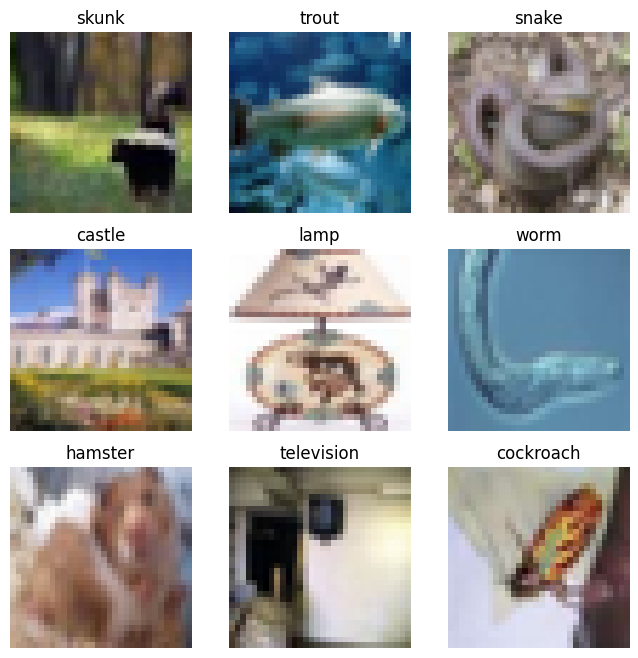

In [50]:
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(train_dataset_unsplitted), size=(1,)).item()
    img, label = train_dataset_unsplitted.data[sample_idx], train_dataset_unsplitted.targets[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(train_dataset_unsplitted.classes[label])
    plt.axis("off")
    plt.imshow(img)
plt.show()

# 4. Оформить датасет объекта класса Dataset в Dataloader.

In [51]:
train_dataloader = DataLoader(dataset['train'], batch_size=64, shuffle=True, num_workers=0)
val_dataloader = DataLoader(dataset['val'], batch_size=64, shuffle=True, num_workers=0)
test_dataloader = DataLoader(dataset['test'], batch_size=64, shuffle=True, num_workers=0)

In [52]:
dataloaders = {'train': train_dataloader, 'val': val_dataloader,'test': test_dataloader}

In [53]:
train_dataloader

# 5. Реализовать архитектуру собственной нейросети и натренировать ее на датасете.

In [54]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using {device} device")

Using cuda device


In [55]:
def train_model(model, dataloader, criterion, optimizer, scheduler, num_epochs=25):
    since = time.time()

    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0

    for epoch in range(num_epochs):
        print('Epoch {}/{}'.format(epoch+1, num_epochs))
        print('-' * 10)

        for phase in ['train', 'val']:
            if phase == 'train':
                model.train() 
            else:
                model.eval()

            running_loss = 0.0
            running_corrects = 0

            for inputs, labels in dataloader[phase]:
                inputs = inputs.to(device)
                labels = labels.to(device)

                optimizer.zero_grad()

                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    _, preds = torch.max(outputs, 1)
                    loss = criterion(outputs, labels)

                    if phase == 'train':
                        loss.backward()
                        optimizer.step()

                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)
            if phase == 'train':
                scheduler.step()

            epoch_loss = running_loss / len(dataset[phase])
            epoch_acc = running_corrects.double() / len(dataset[phase])

            print('{} Loss: {:.4f} Acc: {:.4f}'.format(
                phase, epoch_loss, epoch_acc))

            if phase == 'val' and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = copy.deepcopy(model.state_dict())

        print()

    time_elapsed = time.time() - since
    print('Training complete in {:.0f}m {:.0f}s'.format(
        time_elapsed // 60, time_elapsed % 60))
    print('Best val Acc: {:4f}'.format(best_acc))

    model.load_state_dict(best_model_wts)
    return model

In [56]:
model = nn.Sequential(
    nn.Conv2d(3, 16, 2),
    nn.ELU(),
    nn.MaxPool2d(2),
    nn.Conv2d(16, 32, 2),
    nn.ELU(),
    nn.MaxPool2d(2),
    nn.Conv2d(32, 128, 2),

    nn.Flatten(),

    nn.Linear(4608, 512), 
    nn.ELU(),
    nn.Linear(512, 100)
)

model = model.to(device)

In [59]:
criterion = nn.CrossEntropyLoss()
optimizer_sgd = optim.SGD(model.parameters(), lr=0.0022, momentum=0.9, weight_decay=0.000001)
exp_lr_scheduler = torch.optim.lr_scheduler.StepLR(optimizer_sgd, step_size=5, gamma=0.1)

In [60]:
model = train_model(model, dataloaders ,criterion, optimizer_sgd, exp_lr_scheduler, num_epochs=10)

Epoch 1/10
----------
train Loss: 3.9423 Acc: 0.1104
val Loss: 3.6389 Acc: 0.1606

Epoch 2/10
----------
train Loss: 3.4442 Acc: 0.1916
val Loss: 3.3062 Acc: 0.2153

Epoch 3/10
----------
train Loss: 3.1375 Acc: 0.2455
val Loss: 3.0682 Acc: 0.2603

Epoch 4/10
----------
train Loss: 2.8940 Acc: 0.2883
val Loss: 2.8895 Acc: 0.2971

Epoch 5/10
----------
train Loss: 2.6790 Acc: 0.3320
val Loss: 2.7570 Acc: 0.3262

Epoch 6/10
----------
train Loss: 2.4266 Acc: 0.3926
val Loss: 2.6428 Acc: 0.3506

Epoch 7/10
----------
train Loss: 2.3769 Acc: 0.4035
val Loss: 2.6302 Acc: 0.3548

Epoch 8/10
----------
train Loss: 2.3469 Acc: 0.4079
val Loss: 2.6192 Acc: 0.3546

Epoch 9/10
----------
train Loss: 2.3197 Acc: 0.4146
val Loss: 2.6099 Acc: 0.3604

Epoch 10/10
----------
train Loss: 2.2940 Acc: 0.4203
val Loss: 2.5988 Acc: 0.3626

Training complete in 4m 11s
Best val Acc: 0.362600


# 6. Обучить нейросеть, используя Transfer Learning. 

In [64]:
model_updated = models.resnet50(pretrained=True)

model_updated = model_updated.to(device)
    
num_features = model_updated.fc.in_features
model_updated.fc = nn.Sequential(
    torch.nn.Linear(num_features, 1024),
    torch.nn.ReLU(),
    torch.nn.Dropout(0.2),
    torch.nn.Linear(1024, 100),
)

model_updated.fc = model_updated.fc.to(device)

criterion = nn.CrossEntropyLoss()
optimizer_sgd = optim.SGD(model_updated.parameters(), lr=0.0022, momentum=0.9, weight_decay=0.000001)
exp_lr_scheduler = torch.optim.lr_scheduler.StepLR(optimizer_sgd, step_size=5, gamma=0.1)

In [65]:
model_updated = train_model(model_updated, dataloaders ,criterion, optimizer_sgd, exp_lr_scheduler, num_epochs=10)

Epoch 1/10
----------
train Loss: 3.2230 Acc: 0.2376
val Loss: 2.1010 Acc: 0.4382

Epoch 2/10
----------
train Loss: 1.9348 Acc: 0.4730
val Loss: 1.7445 Acc: 0.5196

Epoch 3/10
----------
train Loss: 1.5522 Acc: 0.5653
val Loss: 1.6417 Acc: 0.5503

Epoch 4/10
----------
train Loss: 1.3120 Acc: 0.6275
val Loss: 1.6363 Acc: 0.5579

Epoch 5/10
----------
train Loss: 1.1177 Acc: 0.6793
val Loss: 1.6204 Acc: 0.5697

Epoch 6/10
----------
train Loss: 0.7868 Acc: 0.7701
val Loss: 1.3927 Acc: 0.6240

Epoch 7/10
----------
train Loss: 0.6688 Acc: 0.8020
val Loss: 1.3941 Acc: 0.6296

Epoch 8/10
----------
train Loss: 0.6005 Acc: 0.8210
val Loss: 1.3850 Acc: 0.6311

Epoch 9/10
----------
train Loss: 0.5556 Acc: 0.8364
val Loss: 1.4020 Acc: 0.6264

Epoch 10/10
----------
train Loss: 0.5086 Acc: 0.8454
val Loss: 1.4014 Acc: 0.6316

Training complete in 7m 9s
Best val Acc: 0.631600


# 7. Посчитать метрики качества финальной модели, сделать выводы.



In [66]:
def all_accuracy(net, testloader):
    correct = 0
    total = 0
    with torch.no_grad():
        for data in testloader:
            images, labels = data
            images, labels = images.cuda(), labels.cuda()
            outputs = net(images)

            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    print('Accuracy of the network on the 10000 test images: {} %'.format(
        100 * correct / total))

In [67]:
def class_accuracy(net, testloader):
    class_correct = list(0. for i in range(100))
    class_total = list(0. for i in range(100))
    with torch.no_grad():
        for data in testloader:
            images, labels = data
            images, labels = images.cuda(), labels.cuda()
            outputs = net(images)
            _, predicted = torch.max(outputs, 1)
            c = (predicted == labels).squeeze()
            for i in range(16):
                label = labels[i]
                class_correct[label] += c[i].item()
                class_total[label] += 1


    for i in range(100):
        print('Accuracy of {} : {} %'.format(
            i, 100 * class_correct[i] / class_total[i]))

In [68]:
all_accuracy(model, dataloaders['test'])

Accuracy of the network on the 10000 test images: 41.554 %


In [69]:
all_accuracy(model_updated, dataloaders['test'])

Accuracy of the network on the 10000 test images: 85.418 %


In [70]:
class_accuracy(model, dataloaders['test'])

Accuracy of 0 : 69.6 %
Accuracy of 1 : 52.892561983471076 %
Accuracy of 2 : 24.576271186440678 %
Accuracy of 3 : 23.015873015873016 %
Accuracy of 4 : 21.374045801526716 %
Accuracy of 5 : 43.90243902439025 %
Accuracy of 6 : 42.4 %
Accuracy of 7 : 48.333333333333336 %
Accuracy of 8 : 54.01459854014598 %
Accuracy of 9 : 50.81967213114754 %
Accuracy of 10 : 21.774193548387096 %
Accuracy of 11 : 23.68421052631579 %
Accuracy of 12 : 41.86046511627907 %
Accuracy of 13 : 38.23529411764706 %
Accuracy of 14 : 38.983050847457626 %
Accuracy of 15 : 26.428571428571427 %
Accuracy of 16 : 30.89430894308943 %
Accuracy of 17 : 64.28571428571429 %
Accuracy of 18 : 34.4 %
Accuracy of 19 : 39.39393939393939 %
Accuracy of 20 : 67.76859504132231 %
Accuracy of 21 : 58.064516129032256 %
Accuracy of 22 : 29.508196721311474 %
Accuracy of 23 : 56.91056910569106 %
Accuracy of 24 : 59.701492537313435 %
Accuracy of 25 : 22.580645161290324 %
Accuracy of 26 : 36.231884057971016 %
Accuracy of 27 : 29.62962962962963 %


In [71]:
class_accuracy(model_updated, dataloaders['test'])

Accuracy of 0 : 96.06299212598425 %
Accuracy of 1 : 92.0 %
Accuracy of 2 : 71.55963302752293 %
Accuracy of 3 : 76.52173913043478 %
Accuracy of 4 : 77.77777777777777 %
Accuracy of 5 : 90.22556390977444 %
Accuracy of 6 : 86.95652173913044 %
Accuracy of 7 : 83.82352941176471 %
Accuracy of 8 : 94.21487603305785 %
Accuracy of 9 : 89.84375 %
Accuracy of 10 : 86.92307692307692 %
Accuracy of 11 : 70.53571428571429 %
Accuracy of 12 : 81.14754098360656 %
Accuracy of 13 : 79.83193277310924 %
Accuracy of 14 : 92.3076923076923 %
Accuracy of 15 : 85.03937007874016 %
Accuracy of 16 : 90.65420560747664 %
Accuracy of 17 : 93.02325581395348 %
Accuracy of 18 : 89.47368421052632 %
Accuracy of 19 : 78.03030303030303 %
Accuracy of 20 : 96.09375 %
Accuracy of 21 : 94.24460431654676 %
Accuracy of 22 : 89.51612903225806 %
Accuracy of 23 : 90.0 %
Accuracy of 24 : 91.81818181818181 %
Accuracy of 25 : 85.61643835616438 %
Accuracy of 26 : 77.57009345794393 %
Accuracy of 27 : 83.45323741007195 %
Accuracy of 28 : 93

###### Таким образом, точность нейронной сети на 10000 тестовых изображениях на основе transfer learning намного выше, чем на основе архитектуры собственной нейронной сети.